In [3056]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 

In [3057]:
def calculate_cov_mat(X, mean_vec):
    X_zero_center = X - mean_vec    
    return ((X_zero_center.T @ X) / X.shape[ 0]).values

In [3058]:
def plot_cov_mtrx(cov_mtrx, dataset_num, class_num):
    alpha = ['1', '2']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cov_mtrx,interpolation='nearest') 
    fig.colorbar(cax)
    ax.set_xticklabels(['']+alpha)
    ax.set_yticklabels(['']+alpha)
    ax.set_title(f"Covarience matrix for dataset {dataset_num}, class y = {class_num}")



Covariance matrix for dataset 1 class 0
 [[0.68057796 0.00818641]
 [0.00818641 0.39271117]]
Covariance matrix for dataset 1 class 1
 [[0.35362982 0.00906748]
 [0.00906748 1.43739033]]
Covariance matrix for dataset 2 class 0
 [[0.43273853 0.09432622]
 [0.09432622 0.06666258]]
Covariance matrix for dataset 2 class 1
 [[0.43279161 0.09416626]
 [0.09416626 0.06658474]]


/var/folders/6h/g5v5834n5mgg95k1hkl9_yc40000gn/T/ipykernel_65017/153186894.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
/var/folders/6h/g5v5834n5mgg95k1hkl9_yc40000gn/T/ipykernel_65017/153186894.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


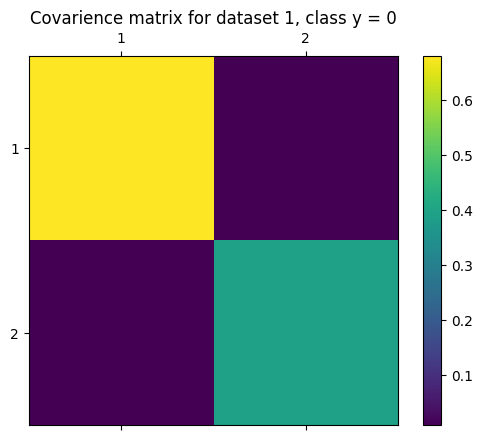

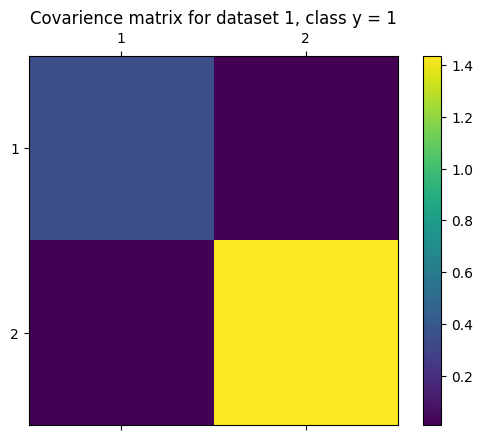

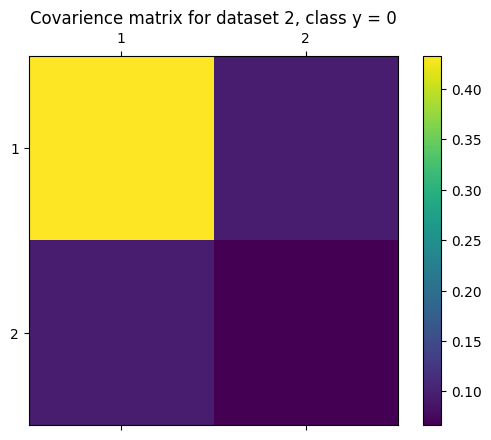

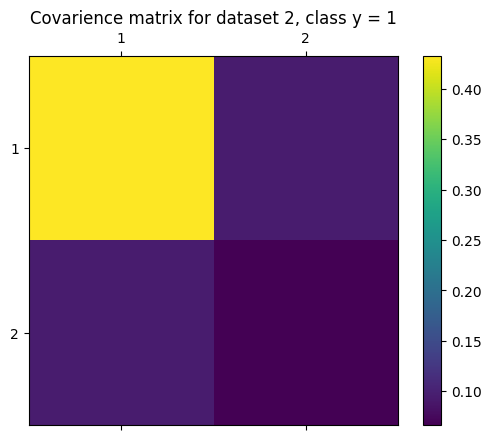

In [3059]:
df1_c0_X = df1[df1["2"] == 0][["0","1"]]
df1_c1_X = df1[df1["2"] == 1][["0","1"]]
df2_c0_X = df2[df2["2"] == 0][["0","1"]]
df2_c1_X = df2[df2["2"] == 1][["0","1"]]

df1_l0_mean_vec = np.mean(df1_c0_X, axis = 0)
df1_l1_mean_vec = np.mean(df1_c1_X, axis = 0)
df2_l0_mean_vec = np.mean(df2_c0_X, axis = 0)
df2_l1_mean_vec = np.mean(df2_c1_X, axis = 0)

df1_c0_cov_mtrx = calculate_cov_mat(df1_c0_X, df1_l0_mean_vec)
df1_c1_cov_mtrx = calculate_cov_mat(df1_c1_X, df1_l1_mean_vec)
df2_c0_cov_mtrx = calculate_cov_mat(df2_c0_X, df2_l0_mean_vec)
df2_c1_cov_mtrx = calculate_cov_mat(df2_c1_X, df2_l1_mean_vec)

print("Covariance matrix for dataset 1 class 0\n", df1_c0_cov_mtrx)
print("Covariance matrix for dataset 1 class 1\n", df1_c1_cov_mtrx)
print("Covariance matrix for dataset 2 class 0\n", df2_c0_cov_mtrx)
print("Covariance matrix for dataset 2 class 1\n", df2_c1_cov_mtrx)

plot_cov_mtrx(df1_c0_cov_mtrx, 1, 0)
plot_cov_mtrx(df1_c1_cov_mtrx, 1, 1)
plot_cov_mtrx(df2_c0_cov_mtrx, 2, 0)
plot_cov_mtrx(df2_c1_cov_mtrx, 2, 1)



In [3060]:
def plot_dist_hist(f_vec_1, f_vec_2, feature_name, dataset_num):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(f_vec_1,bins=25, alpha=0.3, color="r", label="label0")
    ax.hist(f_vec_2,bins=25, alpha=0.3, color="b", label="label1")
    ax.set_ylabel("Frequency")
    ax.set_xlabel(f"Feature {feature_name}")
    plt.gca().set(title=f'Data distribution of feature {feature_name} of trainingSet {dataset_num}', ylabel='Frequency')
    ax.legend()

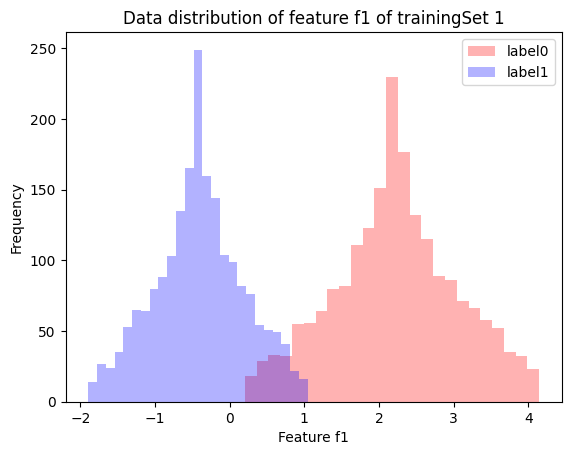

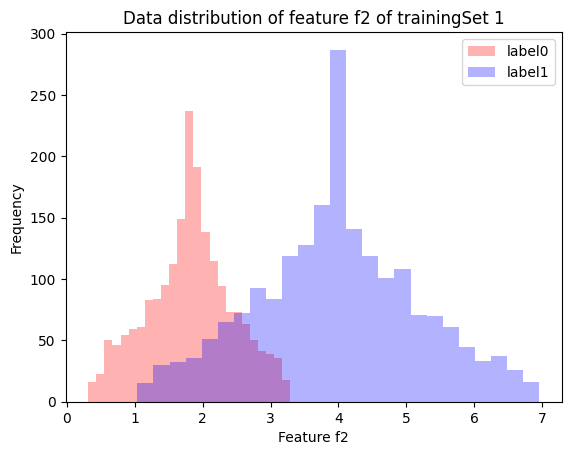

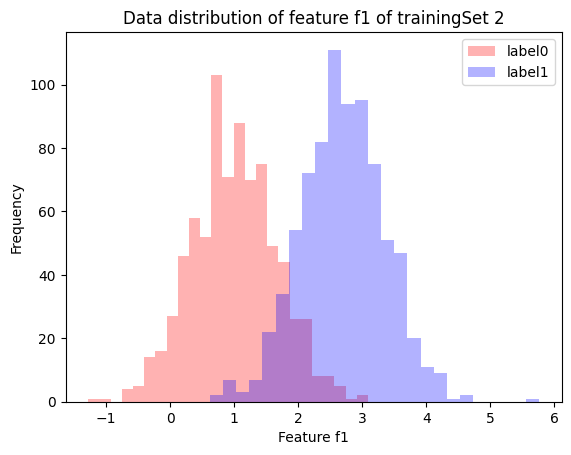

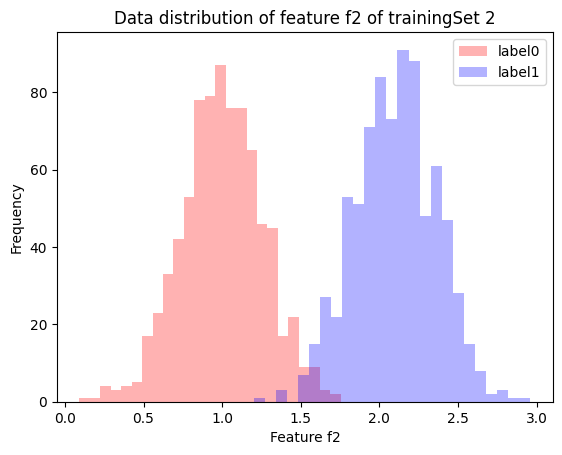

In [3061]:
# feature vectors for dataset1
df1_c0_f0 = df1_c0_X["0"]
df1_c0_f1 = df1_c0_X["1"]
df1_c1_f0 = df1_c1_X["0"]
df1_c1_f1 = df1_c1_X["1"]

# feature vectors for dataset2
df2_c0_f0 = df2_c0_X["0"]
df2_c0_f1 = df2_c0_X["1"]
df2_c1_f0 = df2_c1_X["0"]
df2_c1_f1 = df2_c1_X["1"]

plot_dist_hist(df1_c0_f0, df1_c1_f0, "f1", 1)
plot_dist_hist(df1_c0_f1, df1_c1_f1, "f2", 1)
plot_dist_hist(df2_c0_f0, df2_c1_f0, "f1", 2)
plot_dist_hist(df2_c0_f1, df2_c1_f1, "f2", 2)

In [3062]:
def plot_scatter(c0_feat1, c0_feat2, c1_feat1, c1_feat2, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(c0_feat1, c0_feat2, alpha=0.5, color = "red",label="label0")
    ax.scatter(c1_feat1, c1_feat2, alpha=0.5, color = "blue",label="label1")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title(title)
    ax.legend()

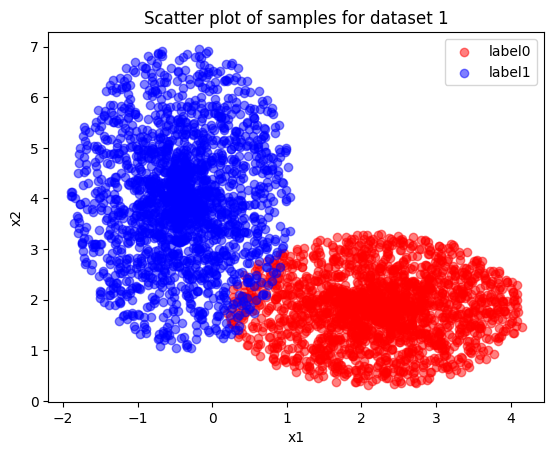

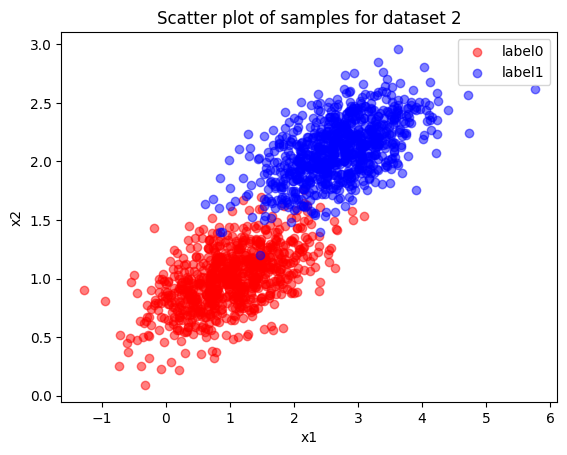

In [3063]:
# For dataset 1
plot_scatter(df1_c0_f0,df1_c0_f1,df1_c1_f0,df1_c1_f1,"Scatter plot of samples for dataset 1")

# For dataset 2
plot_scatter(df2_c0_f0, df2_c0_f1,df2_c1_f0, df2_c1_f1, "Scatter plot of samples for dataset 2")

# PART B

### PART B.1

In [3064]:


print("Mean vector for dataset 1, class 0")
print(df1_l0_mean_vec)
print("Covarience matrix for dataset 1, class 0")
print(df1_c0_cov_mtrx)

print("Mean vector for dataset 1, class 1")
print(df1_l1_mean_vec)
print("Covarience matrix for dataset 1, class 1")
print(df1_c1_cov_mtrx)

print("Mean vector for dataset 2, class 0")
print(df2_l0_mean_vec)
print("Covarience matrix for dataset 2, class 0")
print(df2_c0_cov_mtrx)


print("Mean vector for dataset 2, class 1")
print(df2_l1_mean_vec)
print("Covarience matrix for dataset 2, class 1")
print(df2_c1_cov_mtrx)

Mean vector for dataset 1, class 0
0    2.217696
1    1.816822
dtype: float64
Covarience matrix for dataset 1, class 0
[[0.68057796 0.00818641]
 [0.00818641 0.39271117]]
Mean vector for dataset 1, class 1
0   -0.406573
1    3.973114
dtype: float64
Covarience matrix for dataset 1, class 1
[[0.35362982 0.00906748]
 [0.00906748 1.43739033]]
Mean vector for dataset 2, class 0
0    1.0
1    1.0
dtype: float64
Covarience matrix for dataset 2, class 0
[[0.43273853 0.09432622]
 [0.09432622 0.06666258]]
Mean vector for dataset 2, class 1
0    2.7
1    2.1
dtype: float64
Covarience matrix for dataset 2, class 1
[[0.43279161 0.09416626]
 [0.09416626 0.06658474]]


### PART B.2 LINEAR DISCRIMINANT FUNCTION

In [3065]:
def mahalanobis_distance(x, p, S):
    x_minus_p = x - p
    T_x_minus_p = np.transpose(x_minus_p)
    
    #If the determinant of the matrix is zero it will not have an inverse and  inv function will not work
    if math.isclose(np.linalg.det(S), 0):
        S_inv = np.linalg.pinv(S)
    else:
        S_inv = np.linalg.inv(S)
    
    return np.dot(np.dot(T_x_minus_p, S_inv), x_minus_p)

In [3066]:
def mul_id_mtrx(m):

    return np.isclose(m[0, 0], m[1, 1], atol=10e-3) and np.isclose(m[1, 0], 0, atol=10e-3) and np.isclose(m[0, 1], 0, atol=10e-3)

In [3067]:
def train_bayes(training_dataset):
    samples_mtrx_c0 = training_dataset[training_dataset["2"] == 0][["0","1"]]
    samples_mtrx_c1 = training_dataset[training_dataset["2"] == 1][["0","1"]]

    mean_vec_c0 = np.mean(samples_mtrx_c0, axis=0)
    mean_vec_c1 = np.mean(samples_mtrx_c1, axis=0)
    
    cov_mtrx_c0 = calculate_cov_mat(samples_mtrx_c0, mean_vec_c0)
    cov_mtrx_c1 = calculate_cov_mat(samples_mtrx_c1, mean_vec_c1)
    
    Prob_c0 = samples_mtrx_c0.shape[0] / (samples_mtrx_c0.shape[0] + samples_mtrx_c1.shape[1])
    Prob_c1 = samples_mtrx_c1.shape[0] / (samples_mtrx_c0.shape[0] + samples_mtrx_c1.shape[1])
    
    if mul_id_mtrx(cov_mtrx_c0) and mul_id_mtrx(cov_mtrx_c1):
        # case 1
        var_c0 = cov_mtrx_c0[0, 0]
        var_c1 = cov_mtrx_c1[0, 0]
        
        if np.isclose(Prob_c0, Prob_c1, atol=10e-3):
            # ln(Prob_c0) == ln(Prob_c1)

            return lambda x: -np.dot((x - mean_vec_c0).T,(x - mean_vec_c0));\
                   lambda x: -np.dot((x - mean_vec_c1).T,(x - mean_vec_c1))
        else:
            # ln(Prob_c0) != ln(Prob_c1)
            return lambda x: np.log(Prob_c0) -.5 * -np.dot((x - mean_vec_c0).T,(x - mean_vec_c0)) / var_c0, \
                   lambda x: np.log(Prob_c1) -.5 * -np.dot((x - mean_vec_c1).T,(x - mean_vec_c1)) / var_c1
    
    else:
        # case 2 general case
        return lambda x : (-.5 * mahalanobis_distance(x, mean_vec_c0, cov_mtrx_c0)) - (.5 * np.log(np.linalg.det(cov_mtrx_c0))) + np.log(Prob_c0),\
               lambda x : (-.5 * mahalanobis_distance(x, mean_vec_c1, cov_mtrx_c1)) - (.5 * np.log(np.linalg.det(cov_mtrx_c1))) + np.log(Prob_c1)

In [3068]:
df1_g0x, df1_g1x = train_bayes(df1)
df2_g0x, df2_g1x = train_bayes(df2)
print(df2_g0x)

<function train_bayes.<locals>.<lambda> at 0x7fa8b31c7d30>


### PART B.3 TESTING BAYES CLASSIFIER


In [3069]:
def predict(g0x, g1x, test_samples_mtrx):
    y_predict = np.empty((test_samples_mtrx.shape[0], 1))
    
    for i, test_sample in enumerate(test_samples_mtrx):
        if g0x(test_sample) > g1x(test_sample):
            y_predict[i] = 0

        else:
            y_predict[i] = 1
            
    return y_predict

In [3070]:
test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")

test1_X = test1[["0","1"]]
test2_X = test2[["0","1"]]

test1_y_predict = predict(df1_g0x,df1_g1x,test1_X.values)
test2_y_predict = predict(df2_g0x,df2_g1x,test2_X.values)

In [3071]:
test1_y = test1[["2"]]
test2_y = test2[["2"]]

calculation1=np.count_nonzero(test1_y.values - test1_y_predict) / test1_y.values.shape[0] * 100
calculation2=np.count_nonzero(test2_y.values - test2_y_predict) / test2_y.values.shape[0] * 100
print("Error for testing dataset 1: ",calculation1)
print("Error for testing dataset 1: ",calculation2)


Error for testing dataset 1:  1.2
Error for testing dataset 1:  2.0


# PART C  Implementation of PCA 

Projection Matrix:
[[8.70641667 4.45571667 5.80626667 1.88023333]
 [4.45571667 2.384      2.7905     0.88648333]
 [5.80626667 2.7905     4.30451667 1.44851667]
 [1.88023333 0.88648333 1.44851667 0.50388333]]
Features Dataset
            0         1
0    5.912747  2.302033
1    5.572482  1.971826
2    5.446977  2.095206
3    5.436459  1.870382
4    5.875645  2.328290
..        ...       ...
145  9.226517 -0.931293
146  8.566265 -1.039134
147  9.025923 -0.885027
148  9.105599 -0.996416
149  8.490375 -0.915931

[150 rows x 2 columns]


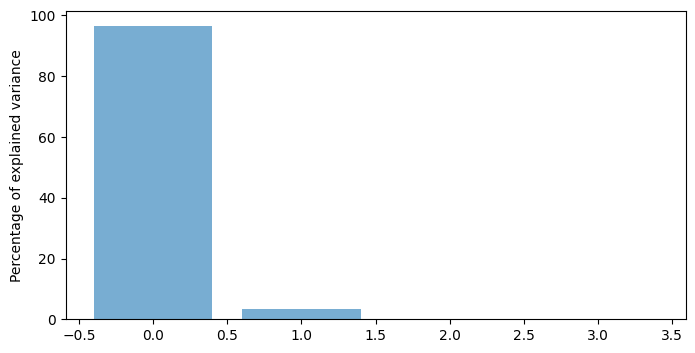

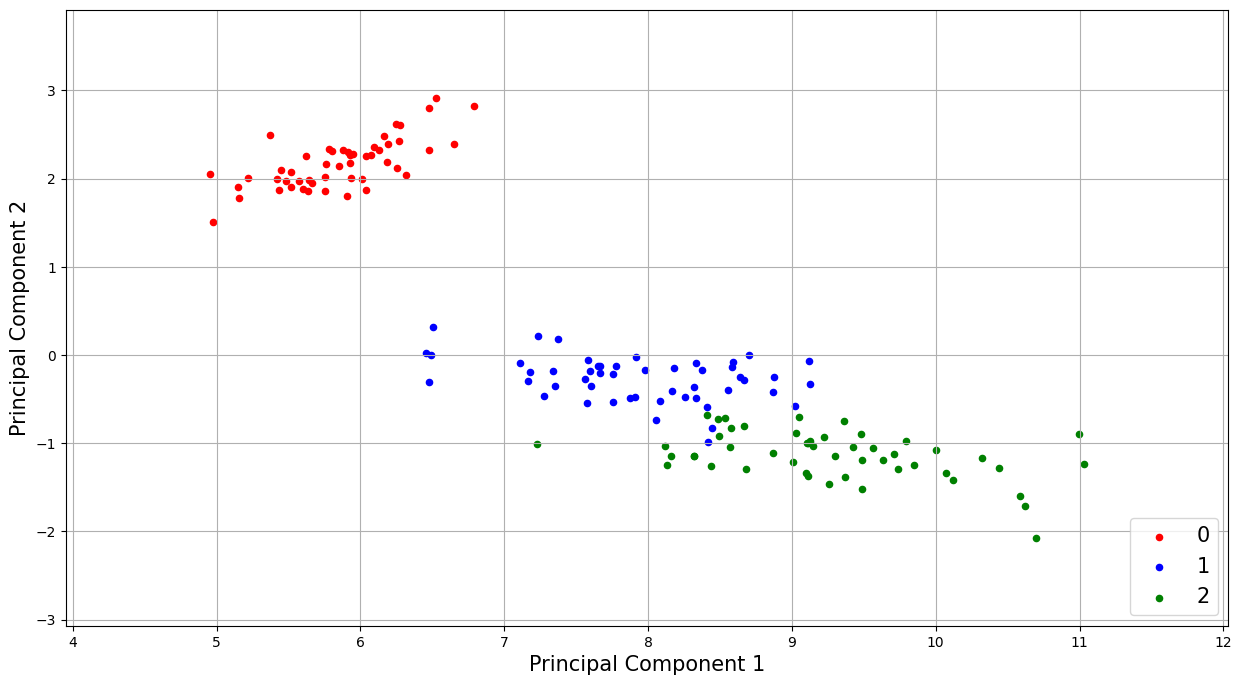

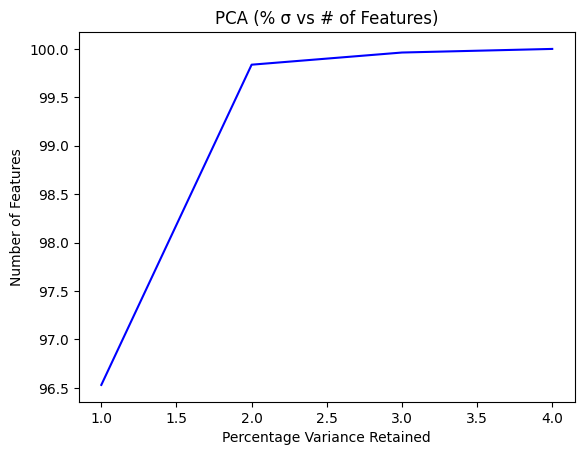

(array([[8.70641667, 4.45571667, 5.80626667, 1.88023333],
        [4.45571667, 2.384     , 2.7905    , 0.88648333],
        [5.80626667, 2.7905    , 4.30451667, 1.44851667],
        [1.88023333, 0.88648333, 1.44851667, 0.50388333]]),
             0         1
 0    5.912747  2.302033
 1    5.572482  1.971826
 2    5.446977  2.095206
 3    5.436459  1.870382
 4    5.875645  2.328290
 ..        ...       ...
 145  9.226517 -0.931293
 146  8.566265 -1.039134
 147  9.025923 -0.885027
 148  9.105599 -0.996416
 149  8.490375 -0.915931
 
 [150 rows x 2 columns])

In [3072]:
from sklearn import datasets
iris = datasets.load_iris()




def scatter_plot_pca(pc1, pc2, target):
    fig, ax = plt.subplots(figsize=(15, 8))
    species = target
    species_unique = list(set(target))
    colors = ["r","b","g","p"]


    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=colors[species_unique.index(spec)])

    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)

    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)


    plt.grid()
    plt.axis([min(pc1) - 1, max(pc1) + 1, min(pc2) - 1, max(pc2)+1])
    plt.show()
    

def PCA(X, k=None, varRetained = 0.95, show = False):
    data = X.data
    target = X.target.tolist()
    proj_mtrx = (1 / data.size) * data.transpose().dot(data)
    eigean_values = np.linalg.eig(proj_mtrx)[0]
    eigean_vectors = np.linalg.eig(proj_mtrx)[1]
    print("Projection Matrix:")
    print(proj_mtrx)
    explained_variance = (eigean_values / np.sum(eigean_values))
    features = []
    Retained = 0
    if k:
        for i in range(k):
            features.append(data.dot(eigean_vectors[:,i]))
    else:
        i = 0
        while Retained < varRetained:
            features.append(data.dot(eigean_vectors[:,i]))
            Retained += explained_variance[i]
            i += 1
    print("Features Dataset")
    print(pd.DataFrame(features).transpose())

    d = pd.DataFrame(features).transpose()

    if show:
        x = np.array([])
        y = np.array([])
        L_value = 0
        L_index = 1
        for value in eigean_values:
            y = np.append(y, explained_variance[L_index - 1]*100)
            x = np.append(x, L_index)
            L_index += 1
        explained_variance=(eigean_values / np.sum(eigean_values))*100
        plt.figure(figsize=(8,4))
        plt.bar(range(4), explained_variance, alpha=0.6)
        plt.ylabel('Percentage of explained variance')
    data = pd.DataFrame(data)#before pca
    if len(features) >= 2:
        scatter_plot_pca(d[0], d[1], target)
        x = np.array([])
        y = np.array([])
        L_value = 0
        L_index = 1
        for value in eigean_values:
            y = np.append(y, L_value + explained_variance[L_index - 1]*100)
            x = np.append(x, L_index)
            L_value += explained_variance[L_index - 1]*100
            L_index += 1
        plt.gca().set(title='PCA (% σ vs # of Features)', ylabel='Number of Features',xlabel='Percentage Variance Retained')
        plt.plot(x, y/100, color="blue")
        plt.show()
        

    return proj_mtrx, pd.DataFrame(features).transpose()


PCA(iris,k=2,show=True)

